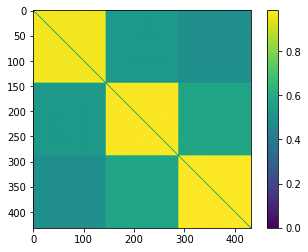

In [124]:
import numpy as np
import matplotlib.pyplot as plt

dim = 1000
# nr = 72*2
# nv = 216*2
# nt = 216*2

# a1 = np.random.normal(0,.1,dim)
# a2 = np.random.normal(0,2,dim)
# a3 = np.random.normal(0,2,dim)

# aa1 = np.random.normal(0,.1,dim)
# aa2 = np.random.normal(0,2,dim)
# aa3 = np.random.normal(0,2,dim)

# a12 = np.random.normal(0,.1,dim)
# a23 = np.random.normal(0,2,dim)
# a31 = np.random.normal(0,.1,dim)

# aa12 = np.random.normal(0,.1,dim)
# aa23 = np.random.normal(0,2,dim)
# aa31 = np.random.normal(0,.1,dim)

# a123 = np.random.normal(0,2,dim)

# aa123 = np.random.normal(0,2,dim)

# h = np.random.normal(0,1,dim)

# groups = []

# sigma = 0.5

# for i,n in enumerate([nr,nv,nt]):
#     groups.append([])
#     for a,aa,b,bb,c,cc,d,dd in zip([a1,a2,a3],[aa1,aa2,aa3],
#                           [a12,a12,a31],[aa12,aa12,aa31],
#                           [a31,a23,a23],[aa31,aa23,aa23],
#                           [a123,a123,a123,a123],[aa123,aa123,aa123,aa123]):
#         groups[i].append(np.repeat([a*h+b*h+c*h+d*h],int(n/24),axis=0) 
#                          + np.random.normal(0,sigma,(int(n/24),dim)))
#         groups[i].append(np.repeat([aa*h+bb*h+cc*h+dd*h],int(n/24),axis=0) 
#                          + np.random.normal(0,sigma,(int(n/24),dim)))
#         groups[i].append(np.repeat([a*h+aa*h+b*h+bb*h+c*h+cc*h+d*h+dd*h],int(n/24),axis=0) 
#                          + np.random.normal(0,sigma,(int(n/24),dim)))
#         groups[i].append(0#np.repeat([a*h+b*h+c*h+d*h],int(n/24),axis=0) 
#                          + np.random.normal(0,sigma,(int(n/24),dim)))
# #         groups[i].append(-np.repeat([a*h+b*h+c*h+d*h],int(n/24),axis=0) 
# #                          + np.random.normal(0,sigma,(int(n/24),dim)))
# #         groups[i].append(-np.repeat([aa*h+bb*h+cc*h+dd*h],int(n/24),axis=0) 
# #                          + np.random.normal(0,sigma,(int(n/24),dim)))
# #         groups[i].append(-np.repeat([a*h+aa*h+b*h+bb*h+c*h+cc*h+d*h+dd*h],int(n/24),axis=0) 
# #                          + np.random.normal(0,sigma,(int(n/24),dim)))
# #         groups[i].append(0#-np.repeat([a*h+b*h+c*h+d*h],int(n/24),axis=0) 
# #                          + np.random.normal(0,sigma,(int(n/24),dim)))
#     groups[i] = np.concatenate(groups[i])
                   
# nr = int(nr/2)
# nv = int(nv/2)
# nt = int(nt/2)

nr = 72*2
nv = 216*2
nt = 216*2

a1 = np.random.normal(0,1,dim)
a2 = np.random.normal(0,2,dim)
a3 = np.random.normal(0,2,dim)

a12 = np.random.normal(0,1,dim)
a23 = np.random.normal(0,2,dim)
a31 = np.random.normal(0,1,dim)

a123 = np.random.normal(0,2,dim)

h = np.random.normal(0,1,dim)

groups = []

sigma = 0.5

for i,n in enumerate([nr,nv,nt]):
    groups.append([])
    for a,b,c,d in zip([a1,a2,a3],
                          [a12,a12,a31],
                          [a31,a23,a23],
                          [a123,a123,a123,a123]):
        groups[i].append(np.repeat([a*h+b*h+c*h+d*h],int(n/6),axis=0) 
                         + np.random.normal(0,sigma,(int(n/6),dim)))
        groups[i].append(np.repeat([a*h+b*h+c*h+d*h],int(n/6),axis=0) 
                         + np.random.normal(0,sigma,(int(n/6),dim)))
    groups[i] = np.concatenate(groups[i])

def mask(E):
    return (np.ones(E.shape[0])-np.eye(E.shape[0]))*E
                       
plt.imshow(mask(np.corrcoef(groups[1])))
plt.colorbar()
plt.show()

In [125]:
br = np.repeat([[1,0,0]],nr/3,axis=0)
bv = np.repeat([[1,0,0]],nv/3,axis=0)
bt = np.repeat([[1,0,0]],nt/3,axis=0)

yr = np.concatenate([br, br[:,[1,0,2]], br[:,[1,0,2]]])
yv = np.concatenate([bv, bv[:,[1,0,2]], bv[:,[1,0,2]]])
yt = np.concatenate([bt, bt[:,[1,0,2]], bt[:,[1,0,2]]])

gr = groups[0]
gv = groups[1]
gt = groups[2]

print(yr.shape)
print(yv.shape)
print(yt.shape)

(144, 3)
(432, 3)
(432, 3)


In [127]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500).fit(gr, np.argmax(yr, axis=1))
n = clf.predict(gt) == np.argmax(yt, axis=1)
print(np.sum(n)/yt.shape[0])

1.0


In [128]:
rIdcs = np.arange(nr)
rvIdcs = np.arange(nr+nv)
vIdcs = np.arange(nr,nr+nv)
tIdcs = np.arange(nr+nv,nr+nv+nt)

print([min(rIdcs),max(rIdcs)])
print([min(rvIdcs),max(rvIdcs)])
print([min(vIdcs),max(vIdcs)])
print([min(tIdcs),max(tIdcs)])

[0, 143]
[0, 575]
[144, 575]
[576, 1007]


In [129]:
import torch

X = torch.from_numpy(np.concatenate([gr, gv, gt])).unsqueeze(1).float().cuda()
y = torch.from_numpy(np.concatenate([yr, yv, yt])).float().cuda()

print(X.shape)
print(y.shape)

torch.Size([1008, 1, 1000])
torch.Size([1008, 3])


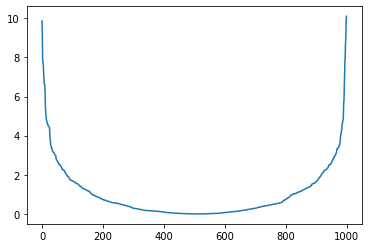

In [130]:
from scipy.ndimage import filters

a10 = a1**2-(a2**2+a3**2+a12**2+a23**2+a31**2+a123**2)**0.5
idcs = np.argsort(a1)

ker = np.ones(1)/1
a10 = filters.convolve1d(np.maximum(a10,-10), ker)

# plt.plot(a10[idcs])
plt.plot(a1[idcs]**2)
plt.show()

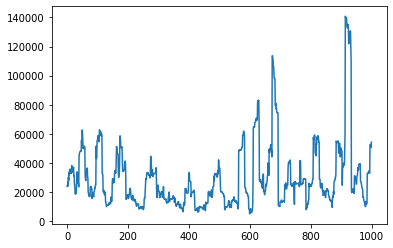

In [134]:
from cca_zoo.models import rCCA, KTCCA

cca = rCCA(latent_dims=10,c=[0,0])
# cca = KTCCA(latent_dims=5)
cca.fit((gv, gv))
load = cca.get_loadings((gv[0:72], gv[0:72]))[1]

corr = np.einsum('ab,bc->bc',gv[0:72],load)
corr = np.sum(np.abs(corr), axis=1)


ker = np.ones(20)/20
sigCorr = filters.convolve1d(corr[idcs], ker)

plt.plot(sigCorr)
plt.show()

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn.dense import DenseGCNConv

ypred_gcn = []

def arith(n):
    return int(n*(n+1)/2)

class GCN(nn.Module):
    def __init__(self, nTgt, dp=0.5):
        super(GCN, self).__init__()
        self.gcn = []
        for i in range(2*nTgt):
            self.gcn.append(DenseGCNConv(dim,40).float().cuda())
            self.gcn.append(DenseGCNConv(40,3).float().cuda())
        self.gcn = nn.ModuleList(self.gcn)
        self.dp = nn.Dropout(p=dp)

    def forward(self, x):
        e = torch.ones(x.shape[0], x.shape[0]).float().cuda()/x.shape[0]
        x = self.dp(x)
        res = []
        for i in range(x.shape[1]):
            y = F.relu(self.gcn[2*i](x[:,i,:],e)).squeeze()
            y = self.gcn[2*i+1](y,e).squeeze()
            res.append(y)
        return res

class MLP(nn.Module):
    def __init__(self, nTgt, dp=0.5):
        super(MLP, self).__init__()
        self.lin = []
        for i in range(2*nTgt):
            self.lin.append(nn.Linear(dim,100).float().cuda())
            self.lin.append(nn.Linear(100,3).float().cuda())
        self.lin = nn.ModuleList(self.lin)
        self.dp = nn.Dropout(p=dp)

    def forward(self, x):
        x = self.dp(x)
        res = []
        for i in range(x.shape[1]):
            y = F.relu(self.lin[2*i](x[:,i,:])).squeeze()
            y = self.lin[2*i+1](y).squeeze()
            res.append(y)
        return res

def validate(model, X, y, testIdcs):
    model.eval()
    with torch.no_grad():
        res = model(X)
        avg = torch.mean(torch.stack(res), dim=0)
        if res[0].dim() == 1:
            loss = mseLoss(avg[testIdcs], y[testIdcs]).cpu().numpy()**0.5
        else:
            corr = (torch.argmax(avg, dim=1) == torch.argmax(y, dim=1))[testIdcs]
            loss = torch.sum(corr)/len(testIdcs)
    model.train()
    return loss, avg

ceLoss = torch.nn.CrossEntropyLoss()
mseLoss = torch.nn.MSELoss()

nEpochs = 4000
pPeriod = 200
thresh = 0.0001

rmse = []

for i in range(1):
    validLoss = []

    gcn0 = MLP(1, 0.5)
    params = list(gcn0.parameters())
    optim = torch.optim.Adam(params, lr=1e-4, weight_decay=1e-4)

    for epoch in range(nEpochs):
        optim.zero_grad()
        res = gcn0(X[rIdcs])
        avg = torch.mean(torch.stack(res), dim=0)
        loss0 = 0
        for r in res + [avg]:
            loss0 += ceLoss(r, y[rIdcs])/(len(res)+1)
        loss = torch.stack([loss0])
        loss += 10*torch.mean(torch.abs(gcn0.lin[0].weight))
        torch.sum(loss).backward()
        optim.step()
        if epoch % pPeriod == 0 or epoch == nEpochs-1 or torch.all(loss[0:3] < thresh):
            print(f'epoch {epoch} loss={(float(loss[0]))}')
            lossV, _ = validate(gcn0, X[rvIdcs], y[rvIdcs], vIdcs)
            if len(validLoss) == 0 or lossV > max(validLoss):
                print(f'New best validation epoch {epoch} loss={lossV}')
                torch.save(gcn0.state_dict(), '../../Work/LatentSim/gcn.pyt')
#                 if lossV == 1:
#                     print('Early stopping')
#                     break
    #                     finalRes[i] = Xt.grad.detach()
            validLoss.append(lossV)
            if torch.all(loss[0:3] < thresh):
                print('Early stopping')
                break

    print('Finished training')

#     gcn0.load_state_dict(torch.load('../../Work/LatentSim/gcn.pyt'))
    loss0, corr = validate(gcn0, X, y, tIdcs)
    ypred_gcn.append(corr.detach().cpu().numpy())

    rmse.append((float(loss0)))
    print(rmse[-1])
    
print('---')
print(np.mean(rmse))
print(np.std(rmse))

epoch 0 loss=1.662325382232666
New best validation epoch 0 loss=0.05787036940455437
epoch 200 loss=0.1436939537525177
New best validation epoch 200 loss=1.0
epoch 400 loss=0.12225461006164551
epoch 600 loss=0.10300759971141815
epoch 800 loss=0.08718687295913696
epoch 1000 loss=0.07409413158893585
epoch 1200 loss=0.0631139948964119
epoch 1400 loss=0.05374464765191078
epoch 1600 loss=0.04574105516076088
epoch 1800 loss=0.038965821266174316
epoch 2000 loss=0.033017925918102264
epoch 2200 loss=0.028001463040709496
epoch 2400 loss=0.023598792031407356
epoch 2600 loss=0.019884774461388588
epoch 2800 loss=0.016682825982570648
epoch 3000 loss=0.01392836682498455
epoch 3200 loss=0.011628074571490288
epoch 3400 loss=0.009686080738902092
epoch 3600 loss=0.008103720843791962
epoch 3800 loss=0.006724019069224596
epoch 3999 loss=0.005712009966373444
Finished training
1.0
---
1.0
0.0


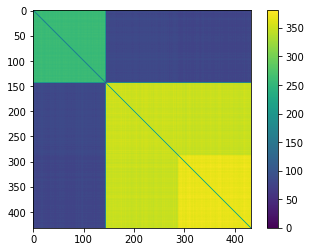

In [136]:
def mask(E):
    return (np.ones(E.shape[0])-np.eye(E.shape[0]))*E

D1 = X[tIdcs].squeeze()@gcn0.lin[0].weight[:,:].T
D2 = X[tIdcs].squeeze()@gcn0.lin[0].weight[:,:].T

Emlp = D1@D2.T
plt.imshow(mask(Emlp.detach().cpu().numpy()))
plt.colorbar()
plt.show()

In [137]:
# ranks = torch.argsort(Emlp[0:60,:], dim=1)[:,-60:-1]
# seg = torch.unique(ranks.flatten()).cpu().detach()[:60]
# print(seg)
# segInv = torch.from_numpy(np.setdiff1d(np.arange(180),seg))
# print(segInv)


ranks = torch.argsort(Emlp[0:18,:], dim=1, descending=True)[:,0:30].reshape(-1)
bins = torch.bincount(ranks)
seg = torch.argsort(bins, descending=True)[0:torch.sum(bins > 10)].cpu().detach()
print(seg)
segInv = torch.from_numpy(np.setdiff1d(np.arange(216),seg))
print(segInv)

tensor([ 63,  60,  51,  53, 142, 138, 139, 133,  90,  17,   0,   5, 128,  32,
         80,  72, 102,  91, 103,  99,  39, 118, 122, 125,  27,  16,  46,  31,
        116])
tensor([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  33,  34,
         35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  47,  48,  49,  50,
         52,  54,  55,  56,  57,  58,  59,  61,  62,  64,  65,  66,  67,  68,
         69,  70,  71,  73,  74,  75,  76,  77,  78,  79,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98, 100, 101,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 119,
        120, 121, 123, 124, 126, 127, 129, 130, 131, 132, 134, 135, 136, 137,
        140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 17

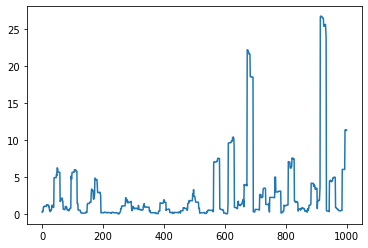

In [138]:
con = torch.einsum('ab,bc->bc',X[vIdcs][0:72].squeeze(),gcn0.lin[0].weight[:,:].T)
con = torch.einsum('bc,bc->b',con,con).detach().cpu().numpy()

ker = np.ones(20)/20
sigMlp = filters.convolve1d((con/60)[idcs], ker)

plt.plot(sigMlp)
plt.show()

In [139]:
import torch
import torch.nn as nn
import torch.nn.functional as F

rmse = []
ypred_sim = []

def mask(e):
    return e - torch.diag(torch.diag(e.detach()))

class LatSim(nn.Module):
    def __init__(self, inp, dp=0.5, edp=0.1):
        super(LatSim, self).__init__()
        l = nn.Parameter(1e-4*torch.rand(inp.shape[-1],2).float().cuda())
        nl = nn.Parameter(1e-3*torch.randn(inp.shape[-1],50).float().cuda())
        self.active = nn.ParameterList([nl])
        self.dp = nn.Dropout(p=dp)
        self.edp = nn.Dropout(p=edp)
        self.l = 1
    
    def getLatentsAndEdges(self, x, i):
#         e = 1e-10
        y = torch.einsum('ac,ce->ae', x, self.active[i])
        e = y@y.T
        return y, y, e
        
    def forward(self, x, y, testIdcs=None):
        x = self.dp(x)
        res = []
        es = []
        for i in range(1):
            _, _, e = self.getLatentsAndEdges(x[:,0,:], i)
            if testIdcs is not None:
                e[:,testIdcs] = 0
            e = self.edp(e)
            e = mask(e)
            e[e == 0] = float('-inf')
            e = F.softmax(e, dim=1) 
            es.append(e)
            res.append(e@y)
        return res, es

def validate(model, X, y, testIdcs):
    model.eval()
    with torch.no_grad():
        res, _ = model(X, y, testIdcs)
        avg = torch.mean(torch.stack(res), dim=0)
        if res[0].dim() == 1:
            loss = mseLoss(avg[testIdcs], y[testIdcs]).cpu().numpy()**0.5
        else:
            corr = (torch.argmax(avg, dim=1) == torch.argmax(y, dim=1))[testIdcs]
            loss = torch.sum(corr)/len(testIdcs)
    model.train()
    return loss, avg.detach().cpu().numpy()

nEpochs = 200
pPeriod = 5
thresh = 0.1

ceLoss = torch.nn.CrossEntropyLoss()
mseLoss = torch.nn.MSELoss()

for i in range(1):
    sim = LatSim(X, 0.5, 0) # 0.2 wrat, 0.1 other
    optim = torch.optim.Adam(sim.parameters(), lr=1e-5, weight_decay=1e-5)
    
    validLoss = []
    
    for epoch in range(nEpochs):
        optim.zero_grad()
        res, es = sim(X[rIdcs], y[rIdcs])
        avg = torch.mean(torch.stack(res), dim=0)
        loss = 0
        for r in res + [avg]:
            loss += ceLoss(r, y[rIdcs])
        loss = torch.stack([loss/(len(res)+1)])
#         loss += 100*torch.mean(torch.abs(es[0]))
        torch.sum(loss).backward()
        optim.step()
        sim.l = float(loss)
        if epoch % pPeriod == 0 or epoch == nEpochs-1 or torch.all(loss[0:3] < thresh):
            print(f'epoch {epoch} loss={(float(loss))}')
            lossV, _ = validate(sim, X[rvIdcs], y[rvIdcs], vIdcs)
            if len(validLoss) == 0 or lossV > max(validLoss):
                print(f'New best validation epoch {epoch} loss={lossV}')
                torch.save(sim.state_dict(), '../../Work/LatentSim/sim.pyt')
#                 if lossV == 1:
#                     print('Early stopping')
#                     break
            validLoss.append(lossV)
            if torch.all(loss[0:3] < thresh):
                print('Early stopping')
                break

    print('Finished training')

#     sim.load_state_dict(torch.load('../../Work/LatentSim/sim.pyt'))
    loss, avg = validate(sim, X, y, tIdcs)
    ypred_sim.append(avg)
    rmse.append(loss.cpu().numpy())
    print(rmse[-1])

print('---')
print(np.mean(rmse))
print(np.std(rmse))

epoch 0 loss=0.8810757398605347
New best validation epoch 0 loss=0.6666666865348816
epoch 5 loss=0.8034954071044922
epoch 10 loss=0.7111127972602844
New best validation epoch 10 loss=1.0
epoch 15 loss=0.6149508357048035
epoch 20 loss=0.5730735063552856
epoch 25 loss=0.5589560866355896
epoch 30 loss=0.5549071431159973
epoch 35 loss=0.5531749725341797
epoch 40 loss=0.5523887276649475
epoch 45 loss=0.552159309387207
epoch 50 loss=0.5520660281181335
epoch 55 loss=0.5518835186958313
epoch 60 loss=0.5520265698432922
epoch 65 loss=0.5519012808799744
epoch 70 loss=0.5517749786376953
epoch 75 loss=0.5518350601196289
epoch 80 loss=0.5517000555992126
epoch 85 loss=0.5517163872718811
epoch 90 loss=0.5516663193702698
epoch 95 loss=0.5517057776451111
epoch 100 loss=0.5517351031303406
epoch 105 loss=0.5516445636749268
epoch 110 loss=0.55165034532547
epoch 115 loss=0.5516654253005981
epoch 120 loss=0.5517165064811707
epoch 125 loss=0.551587700843811
epoch 130 loss=0.5515930652618408
epoch 135 loss=0.5

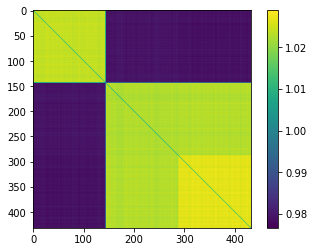

In [141]:
def mask(E):
    return (torch.ones(E.shape[0])-torch.eye(E.shape[0]))*E

msk = np.concatenate([idcs])

D1 = (X[vIdcs].squeeze()[:,msk]@sim.active[0][msk,:])
D2 = (X[vIdcs].squeeze()[:,msk]@sim.active[0][msk,:])
# Esim = torch.softmax(mask(D1.cpu()@D2.T.cpu())/100, dim=1)
Esim = torch.exp(mask(D1.cpu()@D2.T.cpu())/200)
plt.imshow(Esim.detach().cpu().numpy())
plt.colorbar()
plt.show()

In [142]:
print(Esim[15,20])
print(Esim[15,150])

tensor(1.0233, grad_fn=<SelectBackward0>)
tensor(0.9787, grad_fn=<SelectBackward0>)


In [143]:

ranks = torch.argsort(Esim[0:36,:], dim=1, descending=True)[:,0:9].reshape(-1)
bins = torch.bincount(ranks)
seg = torch.argsort(bins, descending=True)[0:torch.sum(bins > 2)]
print(seg)
segInv = torch.from_numpy(np.setdiff1d(np.arange(216),seg))
print(segInv)

tensor([92, 76, 55, 54, 87, 28, 26,  6,  5, 91])
tensor([  0,   1,   2,   3,   4,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
         46,  47,  48,  49,  50,  51,  52,  53,  56,  57,  58,  59,  60,  61,
         62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  88,  89,  90,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 17

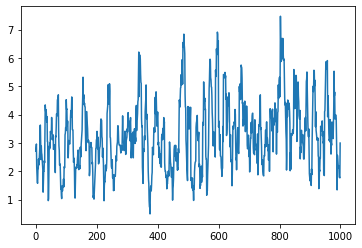

In [144]:
a = torch.mean(X[vIdcs][0:72].squeeze(), dim=0)
b = torch.mean(X[vIdcs][144:216].squeeze(), dim=0)
c = torch.mean(X[vIdcs][288:360].squeeze(), dim=0)
d = torch.abs(a-b-c).detach().cpu().numpy()

ker = np.ones(10)/10
d = filters.convolve1d(d[idcs], ker)

plt.plot(d)
plt.show()

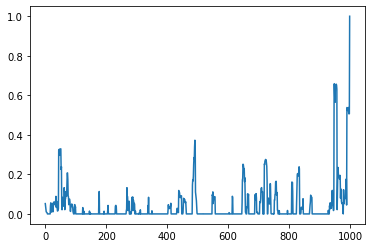

In [147]:
con = torch.einsum('ab,bc->bc',X[vIdcs][0:144].squeeze(),sim.active[0][:,:])
con0 = con
con = torch.einsum('bc,bc->b',con,con).detach().cpu().numpy()

conInv = torch.einsum('ab,bc->bc',X[vIdcs][144:288].squeeze(),sim.active[0][:,:])
conInv = torch.einsum('bc,bc->b',con0,conInv).detach().cpu().numpy()

conInv2 = torch.einsum('ab,bc->bc',X[vIdcs][288:444].squeeze(),sim.active[0][:,:])
conInv2 = torch.einsum('bc,bc->b',con0,conInv2).detach().cpu().numpy()

from scipy.ndimage import filters
ker = np.ones(10)/10
sigSim = filters.convolve1d((con/36-conInv/36-conInv2/36)[idcs], ker)

plt.plot(np.maximum(sigSim,0)/max(sigSim))
# plt.plot(a1[idcs]**2/(max(a1)**2))
plt.show()

/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


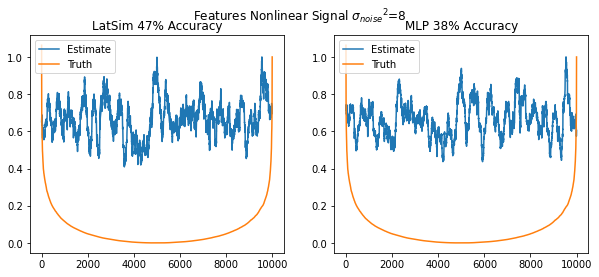

In [488]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].plot(sigSim/max(sigSim), label='Estimate')
ax[0].plot(a1[idcs]**2/(max(a1)**2), label='Truth')
ax[0].legend()
ax[0].set_title('LatSim 47% Accuracy')

ax[1].plot(sigMlp/max(sigMlp), label='Estimate')
ax[1].plot(a1[idcs]**2/(max(a1)**2), label='Truth')
ax[1].legend()
ax[1].set_title('MLP 38% Accuracy')

fig.suptitle(r'Features Nonlinear Signal ${\sigma_{noise}}^2$=8')
# fig.savefig('../../Work/LatentSim/Simulations/Nonlinear8.png', format='png', bbox_inches='tight')
fig.show()

/home/anton/.conda/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


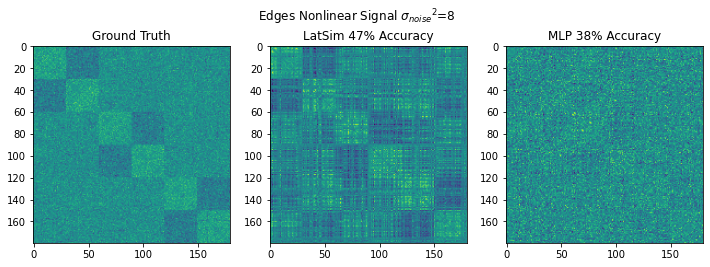

In [409]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

def mask(E):
    return (np.ones(E.shape[0])-np.eye(E.shape[0]))*E

ax[0].imshow(mask(np.corrcoef(groups[1])), vmin=-.1, vmax=.1)
ax[0].set_title('Ground Truth')

ax[1].imshow(Esim.cpu().detach()) 
ax[1].set_title('LatSim 47% Accuracy')

ax[2].imshow(mask(Emlp.cpu().detach().numpy()))
ax[2].set_title('MLP 38% Accuracy')

fig.suptitle(r'Edges Nonlinear Signal ${\sigma_{noise}}^2$=8')
# fig.savefig('../../Work/LatentSim/Simulations/Nonlinear8Edges.png', format='png', bbox_inches='tight')
fig.show()

In [140]:
Xcopy = X.detach().clone()
Xcopy.requires_grad = True
res, _ = sim(Xcopy, y)
loss = ceLoss(res[0], y)
loss.backward()
print(Xcopy[0,0,0:10])
print(y[0:10])
print(Xcopy.grad[0,0,0:10])

tensor([-0.3480,  1.4630, -2.6789, -1.1727,  0.3748, -1.8363, -0.0547, -1.5298,
         0.5193,  5.6394], device='cuda:0', grad_fn=<SliceBackward0>)
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], device='cuda:0')
tensor([-0.0000e+00, -0.0000e+00,  0.0000e+00,  7.8572e-10, -0.0000e+00,
         0.0000e+00, -0.0000e+00, -0.0000e+00,  0.0000e+00, -8.6693e-09],
       device='cuda:0')
